# Modern Control HW1
Padraic McAtee - 2/10/18

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
import control
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = 6.4, 4.8

## Exercise 2
part b - determine TF:

$G_{yu}=C(sI-A)^{-1}B$

In [2]:
sympy.init_printing()

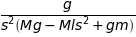

In [3]:
m,g,M,l,s = sympy.symbols('m g M l s')
A = sympy.Matrix([[0,0,1,0],
            [0,0,0,1],
            [0,-m*g/M,0,0],
            [0,(M+m)*g/M/l,0,0]])
B = sympy.Matrix([[0,0,1/M,-1/l/M]]).T
C = sympy.Matrix([[1,l,0,0]])
D = 0
sympy.simplify((C*(s*sympy.eye(4)-A).inv()*B)[0])

part c - stability analysis

In [4]:
m,M,g,l = 1,5,10,.5
A = np.array([[0,0,1,0],
    [0,0,0,1],
    [0,-m*g/M,0,0],
    [0,(M+m)*g/M/l,0,0]])
B = np.array([[0,0,1/M,-1/l/M]]).T
C = np.array([[1,0,0,0]])
D = 0

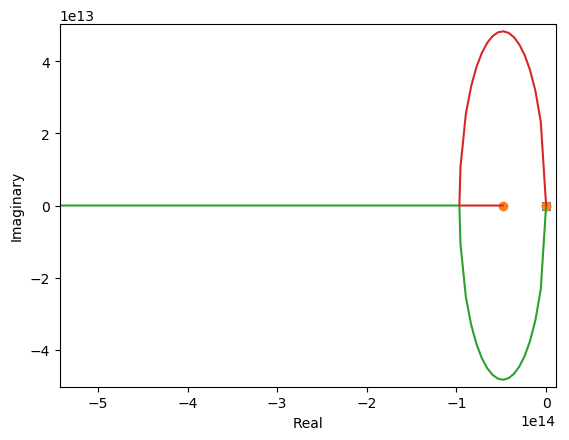

In [5]:
sys = control.ss(A,B,C,D)
control.rlocus(sys);

part e

In [6]:
def s_min(l,omega):
    return np.exp(np.pi*((M+m)*g/M/l)**(1/2)/omega)

In [7]:
L = np.arange(0,2,.01) # lengths
O = [10,12,15] # omegas

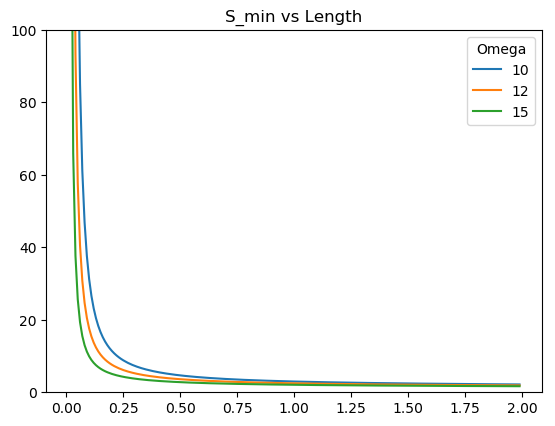

In [8]:
np.seterr(divide='ignore') # divide by zero error handling
for omega in O:
    plt.plot(L,s_min(L,omega),label=str(omega))
plt.ylim(ymax=100,ymin=0)
plt.legend(title='Omega')
plt.title('S_min vs Length');

part f - control output $y=x$

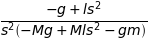

In [9]:
m,g,M,l,s = sympy.symbols('m g M l s')
A = sympy.Matrix([[0,0,1,0],
            [0,0,0,1],
            [0,-m*g/M,0,0],
            [0,(M+m)*g/M/l,0,0]])
B = sympy.Matrix([[0,0,1/M,-1/l/M]]).T
C = sympy.Matrix([[1,0,0,0]])
D = 0
sympy.simplify((C*(s*sympy.eye(4)-A).inv()*B)[0])

In [10]:
m,M,g,l = 1,5,10,1
A = np.array([[0,0,1,0],
    [0,0,0,1],
    [0,-m*g/M,0,0],
    [0,(M+m)*g/M/l,0,0]])
B = np.array([[0,0,1/M,-1/l/M]]).T
C = np.array([[1,0,0,0]])
D = 0

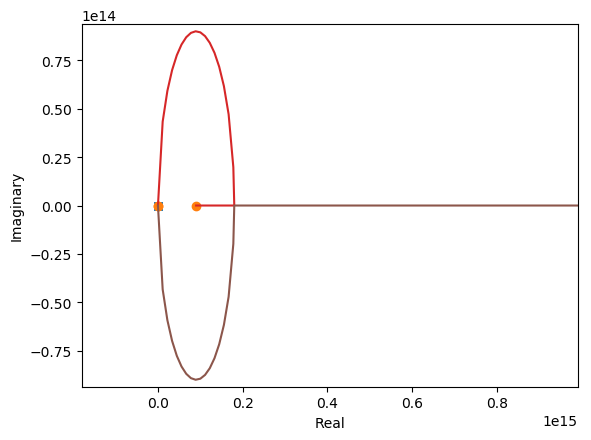

In [11]:
sys = control.ss(A,B,C,D)
control.rlocus(sys);